# Capstone Project: Topic Modelling for CMON

## Notebook 2 Contents:

- Problem Statement
- Executive Summary
- Conclusions and Recommendations
- Next Steps
- Data Guidelines
- Data Dictionary
- 1. Importing Libraries
- 2. Importing Data
- 3. Data Cleansing
    - Remove moderator posts
    - Selecting the columns with useful text data
    - Filling up null values
    - Removing duplicated posts
    - No outliers removed, but "key words"  would be treated in Data Preprocessing

- 4. Data Preprocessing
    - Remove html tags using beautifulsoup
    - Lowercase all words and split up words
    - Remove non-letters: Remove special characters and numbers
    - Remove keywords that points to a specific subreddit
    - Remove stopwords: These are common words that are not useful for text classification
    - Lemmatize words: This will convert each word to its base form
    - Rejoin words back into a string

- 5. Exploratory Data Analysis
    - Wordcloud
    - Barcharts
    - Distribution of Meaningful Words 
    - Top meaningful words

- 6. Saving and exporting of Train/test set
- 7. Preparing and saving and exporting of holdout set in accordance to steps 1 to 4 above
- 8. Topic modelling
- 9. Findings

## Notebook 3 Contents:

- 1. Importing Libraries
- 2. Importing Data
- 3. Modeling
    - CountVectorizer & Logistic Regression
    - TF-IDF & Logistic Regression   
    - CountVectorizer & Naive Bayes 
    - TF-IDF & Naive Bayes  
    - CountVectorizer & SVC
    - TF-IDF & SVC
    - LSTM
- 4. Model Evaluation
- 5. Selection of Production Model
- 7. Identifying the Most Predictive Words
- 8. Applying Chosen Model on Holdout Set
- 9. Success Evaluation

## Data Cleaning, Pre-processing and EDA

## Problem Statement

CMON is a listed company on the HK stock Exchange that sells it's boardgames through a suite of online platforms. It brings boardgames to live by Kickstarter funding and boardgames would go into production once the funding quota is met.

In order to come up with games that are appealing to consumers, it is imperative for CMON to identify customer sentiments, their likes and dislikes and painpoints.

For phase 1 of this project, the data science team has been tasked to classify positive and negative reviews on Boardgamegeeks.com for all of CMON's games using Natural Language Procesisng (NLP).

The model that achieves the highest accuracy on the holdout/test set would be selected for production. The team would also be identifying the key contributors for the classifications.

For phase 2 of the project, the team would be looking at building a recommeder system for CMON based on ratings of the board games.

Phase 1 is crucial for the chief creative director so that CMON is able to understand what consumers like or dislike in their board games so that resources can be channeled to ensuring that the games they launch on kickstarter can be fully and hopefully over subscribed.

Phase 2 would enhance their company's sales by recommending games that players enjoy to encourage purchase.

Deadline for phase 1 would be by the beginning of August 2020 and phase 2 rollout would be dependent on the successful completion of phase 1.

To solve this problem, Natural Language Processing (NLP) will be deployed and binary classification models will be built and the final predictive model will be selected based on the accuracy scores. 

Ultimately,using the predictive model, CMON would be able to uncover the answers to the following problems:

**Is the feedback provided positive or negative?**

**What are the key messages from comments of players?**

The model chosen should achieve an accuracy better than the baseline line score of 0.51 to be deemed successful.

## Executive Summary

**Are trying to figure out whether a comment provided is positive or negative? and Are you trying to decipher the key message from comments?** 

**We can help you!!!**

We seek to examine the comments from BoardGamesGeek for all CMON games.

The optimal classification model with best performance would be use to help figure out if a comment is positive or negative and provide some insights on the key topics or area CMON needs to focus on. This helps CMON to understand the key issues from negative comments as well as the key areas to focus on to make a more informed decision before 

## Conclusions and Recommendations

The production model chosen is TFIDF & SVC and given that our production model achieves 0.67 on accuracy, higher than our baseline model of 0.51 and 0.63 on recall, we can conclude that the model generalises well on unseen data.

We have also identified key areas that CMON needs to work on that consumers like. First, CMON needs to ensure that miniatures for the board games are of a high standard as some consumers buy the game sets for collection rather than playing. Having an expansion set with more miniatures would enable CMON to improve on sales as well as consumers like expansion sets.

Second, the game rules must be simple, but yet allows players to strategise and have different game plays.

Third, it is important for CMON to have a campaign to introduce the new games. This would be be best done over social media and a way could be getting social media influencers to play the games and launch the videos on youtube.

## Limitations and Next Steps 

While the accuracy of the production model is higher than the baseline, it is still not too high. One way to improve this is to collect more data from other sources beside just boardgamegeeks to train the model.

Another way is to consider using BERT( Bidirectional Encoder Representations from Transformer), state of the art model for NLP to see if better results could be obtained.

Next steps would be to share the 3 key areas of focus with CMON and to move on to part 2 of the project, which is to develop a recommender engine for CMON.


## Data Guidelines

Data has been scapped from https://boardgamegeek.com/ for all CMON games. Script is used to scrape all the ratings and comments for all CMON boardgames and saved into CSV format. There are 4 columns including the index.
Other columns include the username ( registered user name for the forum), ratings given by user for the boardgame (from 1 to 10) and comments from the user.

Ratings from 7 and below would be deemed to be negative, ratings from 8 to 10 would be deemed to be positive.

There is one csv for each board games and the data would be compiled for review. Preliminary assessment indicates that there would be approximately 16K rows.

They would be split into 50% (train-test) set and 50% holdout set.

The comments column would be lemmatize/ tokenised into useful words.

Data cleaning:

Remove duplicated reviews
Remove reviews that do not have any meaningful words
Remove reviews that are non-English or gibberish
Pre-processing:

Remove HTML tags
Use regular expression to remove special characters and numbers
Lowercase words
Use NLTK to remove stopwords
Remove common occurring words that appear in both positive and negative sentiments
Use NLTK to stem words to their root form

## Data Dictionary

The data dictionary below provides an overview of the features in our dataset.

| Feature              | Type     | Description                                                                                        |
|:----------------------|:----------|:----------------------------------------------------------------------------------------------------|
| unnamed             | obj      | Serial number of comment                                                                                   |
| userName             | obj      | Username of the reviewer                                                                           |
| Rating            | obj      | Ratings from 0 to 10 by user                                                                         |
| Comment              | obj      | Textual data of the review                                                                         |
| Comment_clean         | int      | Cleaned textual data    
                                                        |
| number_of_words              | obj      | No of words of "useful" words in comment                                                                         |
| Target         | int      |1- Positive comments : Ratings 8 to 10, 0- Negative comment: Ratings 0 to <8




# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import regex as re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from os import path
from PIL import Image
import requests

# Libraries for topic modeling
from pprint import pprint
import gensim
import spacy
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
import pyLDAvis.gensim

%matplotlib inline
pd.set_option('display.max_colwidth', None)

## Exploratory Data Analysis

EDA would be performed on the the comments.

1. Wordcloud to visualise keywords
2. Count to visualise keywords
3. Plot to identify distribution of valuable words etc

## Importing CSV

In [2]:
# Import all .csv files under datasets folder
path = r'../GA Capstone CMON/datasets'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
df.shape

(40431, 7)

In [4]:
# Check that the data has been re-indexed
df.tail()

,Unnamed: 0,username,rating,comment,comment_clean,number_of_words,target
40426,2528,Zyrallus,3.8,"So much potential here. Seriously, with a less punishing (although interesting) leveling mechanism and some form of barricading/defensive options, this would be a go-to game. As it stands, it's fun without being overly impressive. And it's somewhat annoying to witness potential like this fall short of greatness.\n\nEdit 1/3/12:\nPlayed about four or five more times and am putting the game away for good. Way too many problems. Lowering rating substantially. Good intentions, but poor, awful, terrible, blah execution. Shame.",NaN,NaN,NaN
40427,2529,zyx0xyz,7.6,唯一的亮点就是模型和版图美工了，但本人作为一个十多年的生化危机fans，体验zombicide后，实在没有发现更多出彩的地方了，耐玩度主要体现在人物搭配及不同剧本的完成难度上。。。售价也不便宜，现在一个一个扩也接踵而至，价格嘛，你懂的。。。\n【关键词】美式合作，丧尸群包围，扮演幸存者逃生，起手平底锅，升级技能，杀戮屠城，开车地图炮，全部近视眼，敌我通杀\n\n【推荐度】中低,NaN,NaN,NaN
40428,2530,zzool73,8.0,If you are creative there are a lot of house rules that you can apply!,NaN,NaN,NaN
40429,2531,_ph_,9.0,"Still playing a lot of the game with friends, we are making some experiments and trying to anticipade some expansions rules.",NaN,NaN,NaN
40430,2532,_The_Inquiry_,4.0,"Prior to 2020: 1 play\n\nIf there's a single game I'd point to that represents what an ""Ameritrash"" game is, I'd point to this one. This is not because Zombicide is the best this school of design has to offer, far from it in my opinion, but because it embodies so many of the features that crafted this design philosophy - theme that spills everywhere from the components to the rules limitations, over-produced components (large quantities of components, in general, especially given the kickstarter model that this used so well to generate hype) and miniatures, plenty of chaotic dice-rolling accompanied by tactical reacting, and a game that embraces making one's way through chaotic circumstances. This game is certainly one that feels ""epic"" in scale, although its design, in my opinion, falls far short of the table presence engendered by the lavish production. While there's some interesting decisions to be made regarding tactical positioning relative to the hordes of zombies and objectives, the combat, turn structure, and rules fail to augment these decisions, often leading to a game that feels much less than the sum of its parts. Rules such as those that require you target allies before zombies when using ranged weapons to attack a tile with both further detract from the decision-making and tactical positioning, and they end up leaving players without as many viable options. This leads to a game that feels uninteresting and trivial. Couple this with the fact that so much of the early game devolves into searching like mad to find weapons randomly in hopes of getting something slightly more viable, and you have a recipe for boredom. A light beer-and-pretzels game this could be, but the scope and length of the design keep it dragging much longer than it can hold interest, leading to an exhausting slog to the finish. Definite disappointment for what could've been so much more interesting had the design been given depth in the areas that mattered, rather than complexity and fiddliness in the areas that did not.",NaN,NaN,NaN


In [5]:
# Drop selftext duplicates as we only want unique posts
df.drop_duplicates('comment', inplace=True)

In [6]:
df.shape

(21872, 7)

In [7]:
# drop comments with no ratings
df = df.dropna(subset=['rating'])

In [8]:
df.shape

(16859, 7)

## Fill NA

In [9]:
# Check for null values
df.isnull().sum()

Unnamed: 0            0
username              0
rating                0
comment               1
comment_clean      7113
number_of_words    7113
target             7113
dtype: int64

In [10]:
df['comment'].fillna('', inplace=True)

In [11]:
# Double check if there is anymore NA in comment
df.isnull().sum()

Unnamed: 0            0
username              0
rating                0
comment               0
comment_clean      7113
number_of_words    7113
target             7113
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16859 entries, 1 to 40023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16859 non-null  int64  
 1   username         16859 non-null  object 
 2   rating           16859 non-null  float64
 3   comment          16859 non-null  object 
 4   comment_clean    9746 non-null   object 
 5   number_of_words  9746 non-null   float64
 6   target           9746 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.0+ MB


## Data Preprocessing

Pre-processing would enable transformation of our text into a more digestible form so that our classifier can perform better. The steps taken is as follows:

- 1. Remove html tags using beautifulsoup
- 2. Lowercase all words and split word up
- 3. Remove non-letters: Remove special characters and numbers
- 4. Remove keywords that points to a speciic subreddit
- 5. Remove stopwords: These are common words that are not useful for text classification
- 6. Lemmatize words: This will convert each word to its base form
- 7. Finally, rejoin words back into a string

In [13]:
# remove bs4 warnings as scrapping includes pinned moderator posts with many url links and pictures
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [14]:
# Initialise Lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
# Write a function to convert text to a string of meaningful words
def meaningful_text(self_text):
    
    # 1. Remove html tags
    words = BeautifulSoup(self_text).get_text()
    
    # 2. Convert words to lower case and split each word up
    words = self_text.lower()
    
    # iphon likely to be spelling error for iphone, removing it as we do not want iphone inside too
    #words = words.replace('iphon', '') 
    
    # 3. Remove non-letters
    words = re.sub("[^a-zA-Z]", " ", words).split()    
    
    #Searching through a set is faster than searching through a list,so we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # 4. Add certain keywords to stopwords as its too obvious for which reddit
    #stops.update(['Android','Iphone','android','iphon','phone','http','www','com', 'Iphon','IPHON'])
    
    # 5. Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # 6. Lemmatize words
    meaningful_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
   
    # 7. Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [16]:
# Creating clean selftext and clean title, and store them in new columns
df['comment_clean'] = df['comment'].map(meaningful_text)

In [17]:
df.head()

Unnamed: 0        username  rating  \
1            1       abraxasdf    10.0   
8            8        AlphaLoR     8.0   
9            9  andreasrem1980    10.0   
10          10         annie90     4.0   
11          11            Arah     9.8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Comparison between original comment and lemmatized comment

In [18]:
# original comment
df.loc[1]['comment']

'Should not let you rate a game before it even releases'

In [19]:
# lemmatized comment
df.loc[1]['comment_clean']

'let rate game even release'

### Remove comments that do not have any meaningful words

In [20]:
# Find the number of comments with no meaningful words
df['number_of_words'] = df['comment_clean'].str.split().map(len)
df[df['number_of_words']==0].shape

(274, 7)

In [21]:
df[df['number_of_words']==0]['comment']

290                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [22]:
# drop no meaningful word comments
for i in df[df['number_of_words']==0].index:
    no_meaningful_word = df.loc[i]['comment']
    df.drop(i, inplace=True)

In [23]:
# reset index
df.reset_index(drop=True, inplace=True)

## Setting a target variable

Set a target variable base on ratings.<br>
Negative comment (with rating 1-7): 0<br>
Positive comment (with rating 8-10): 1

This gives us an approximate split of 50% positive reviews and 50% negative reviews.

In [24]:
df['target'] = df['rating'].map(lambda x: 1 if x >= 8 else 0)

In [25]:
df['target'].value_counts()

1    8519
0    8066
Name: target, dtype: int64

In [26]:
df.head()

Unnamed: 0        username  rating  \
0           1       abraxasdf    10.0   
1           8        AlphaLoR     8.0   
2           9  andreasrem1980    10.0   
3          10         annie90     4.0   
4          11            Arah     9.8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Create train test set

In [27]:
X = df[[cols for cols in df.columns if cols != 'target']]
y = df['target']

Splitting the data set into Train (80%) and Holdoutset (20%)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Rejoin training and testing dataset, and reindex

In [29]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Training set has 13268 documents

In [30]:
train.shape

(13268, 7)

Testing set has 3317 documents

In [31]:
test.shape

(3317, 7)

Baseline model for training and testing set

In [32]:
train['target'].value_counts(normalize=True)

1    0.513642
0    0.486358
Name: target, dtype: float64

In [33]:
test['target'].value_counts(normalize=True)

1    0.513717
0    0.486283
Name: target, dtype: float64

## WordCloud to visualize keywords

In [34]:
stops = set(stopwords.words('english'))
stops.update(['game','play','player','really','one','card',
              'played','lot','fun','good','get','great','get','theme','well',
              'well','like','make','time','area','much','would','feel'
             ])

In [35]:
def plot_wordcloud(target, title):
    text = df[df['target']==target]['comment_clean'].values # Clean text that we want to wordcloud
    wordcloud = WordCloud(width=2000, 
                          height=1000, 
                          background_color='white', 
                          max_words=200,
                         stopwords=stops).generate(str(text))
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=15, weight='bold')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Removes the axis

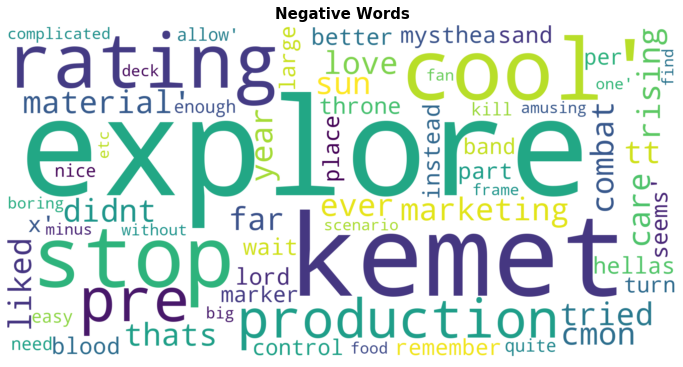

In [36]:
plot_wordcloud(0, 'Negative Words')

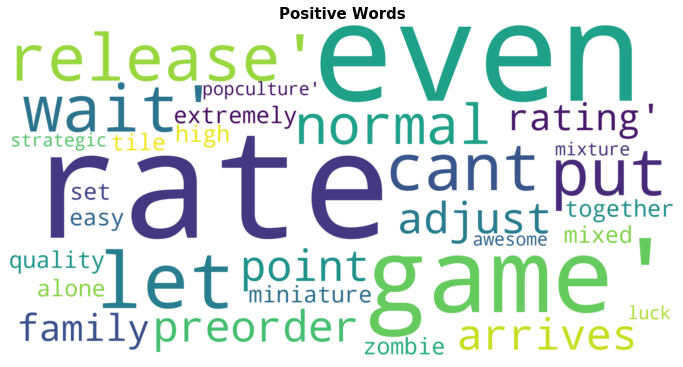

In [37]:
plot_wordcloud(1, 'Positive Words')

## Count to visualise keywords

In [38]:
stops.update(['game','play','player','really','one','card',
              'played','lot','fun','good','get','great','get','theme','well',
              'well','like','make','time','area','much''would','feel'])

In [39]:
def barplot_cvec(target, title, color):
    
    words_series = df[df['target']==target]['comment_clean']
    
    # Instantiate CountVectorizer 
  
    cvec = CountVectorizer(stop_words=stops)
    
    # Save the tokens in a dataframe
    cvec_df = pd.DataFrame(cvec.fit_transform(words_series).todense(), columns=cvec.get_feature_names())
    sum_words = cvec_df.sum(axis=0) # Sum up the no. of occurences for each word
    top_words = sum_words.sort_values(ascending=False).head(20)
    top_words.sort_values(ascending=True).plot(kind='barh', figsize=(10,8), color=color)
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.xlim(0,1200) # Setting a limit for barplot

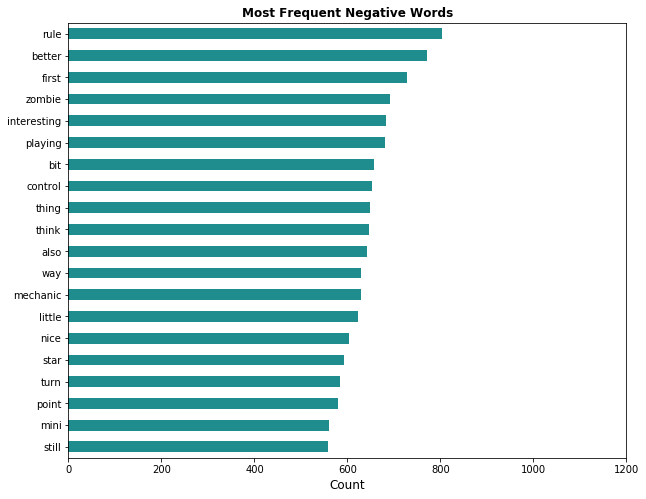

In [40]:
barplot_cvec(0,'Most Frequent Negative Words','#1f8d8d')

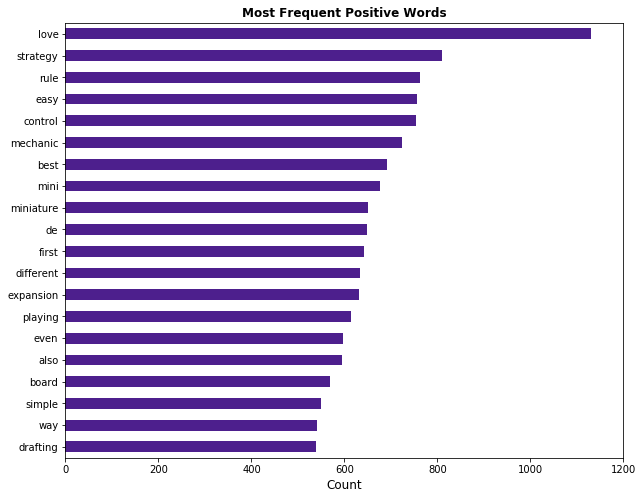

In [41]:
barplot_cvec(1,'Most Frequent Positive Words','#4d1f8d')

## Distribution of meaningful words

In [42]:
df.head()

Unnamed: 0        username  rating  \
0           1       abraxasdf    10.0   
1           8        AlphaLoR     8.0   
2           9  andreasrem1980    10.0   
3          10         annie90     4.0   
4          11            Arah     9.8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

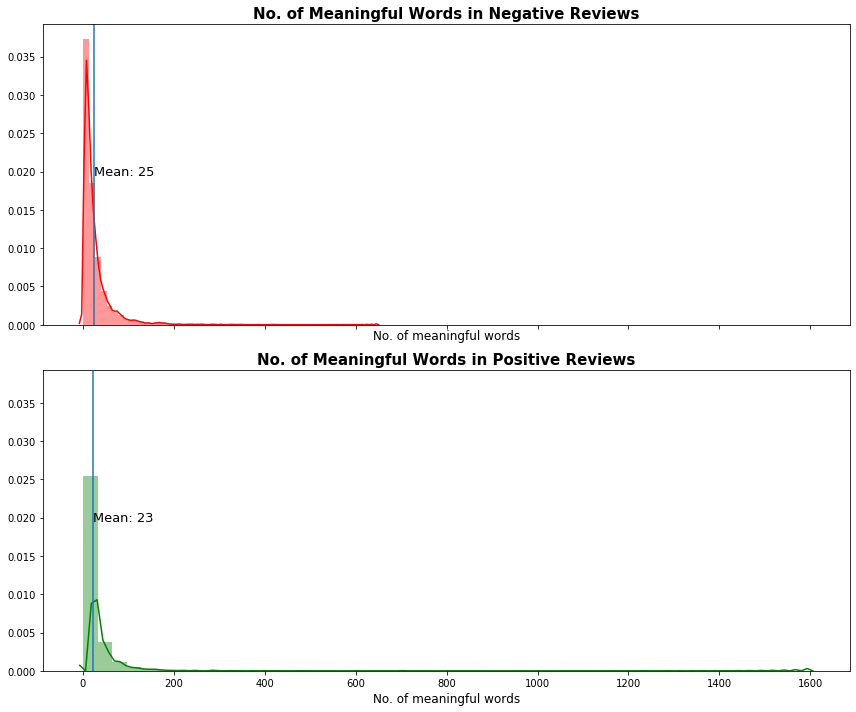

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(12,10), sharex=True, sharey=True)

# Plots the distribution of the length of negative reviews
neg_len = df[df['target']==0]['number_of_words']
sns.distplot(neg_len, color='red', ax=ax[0])
ax[0].axvline(neg_len.mean()) # Plot the mean line
ax[0].text(x=neg_len.mean(),
           y=0.02,
           s=f'Mean: {round(neg_len.mean())}', 
           horizontalalignment='left', 
           verticalalignment='center',
           fontsize=13)
ax[0].set_title('No. of Meaningful Words in Negative Reviews', fontsize=15, fontweight='bold')
ax[0].set_xlabel('No. of meaningful words', size=12)

# Plots the distribution of the length of positive reviews
pos_len = df[df['target']==1]['number_of_words']
sns.distplot(pos_len, color='green', ax=ax[1])
ax[1].axvline(pos_len.mean()) # Plot the mean line
ax[1].text(x=pos_len.mean(),
           y=0.02,
           s=f'Mean: {round(pos_len.mean())}', 
           horizontalalignment='left', 
           verticalalignment='center',
           fontsize=13)
ax[1].set_title('No. of Meaningful Words in Positive Reviews', fontsize=15, fontweight='bold')
ax[1].set_xlabel('No. of meaningful words', size=12)
plt.tight_layout();

In [44]:
df[df['number_of_words']>200]['target'].value_counts().sort_index()

0    56
1    44
Name: target, dtype: int64

Both distributions are right-skewed, with only a small proportion of posts that have >200 meaningful words. The average number of meaningful words in a negative review (25 words) is comparable to than that in a positive review (23 words). This suggests that regardless of whether it is positive or negative reviews, boardgames enthusiats are likley to write around 25 words for comments.

### Barplots: Top uni-grams and bi-grams

We will use CountVectorizer to tokenize our textual data and generate bar plots for the top uni-grams and bi-grams seen in each sentiment.
This may help us understand if there are unique words that will enable us to distinguish between positive and negative sentiments.

In [45]:
# Plots top 20 uni-grams and bi-grams for positive and negative reviews

def barplot_cvec(target, titles, color, xlimit):
    
    words_series = df[df['target']==target]['comment_clean']
    
    fig, ax = plt.subplots(1, 2, figsize=(25,12))
    
    ngram = [(1,1),(2,2)] # The ngrams that we would like to plot
    
    for i in range(2):
            
        # Use CountVectorizer to tokenize the text, 
        cvec = CountVectorizer(stop_words= stops, ngram_range=ngram[i])

        # Save the tokens in a dataframe
        cvec_df = pd.DataFrame(cvec.fit_transform(words_series).todense(), columns=cvec.get_feature_names())
        sum_words = cvec_df.sum(axis=0) # Sum up the no. of occurences for each word
        top_words = sum_words.sort_values(ascending=False).head(20)
        top_words.sort_values(ascending=True).plot(kind='barh', color=color, ax=ax[i])

        # Adjust plot aesthetics
        ax[i].set_title(titles[i], size=25, weight='bold')
        ax[i].set_xlabel('Count', size=20)
        ax[i].set_xlim(xlimit) # Setting a limit so that the barplots are comparable
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        ax[i].tick_params(axis='both', which='minor', labelsize=20)

    plt.tight_layout()

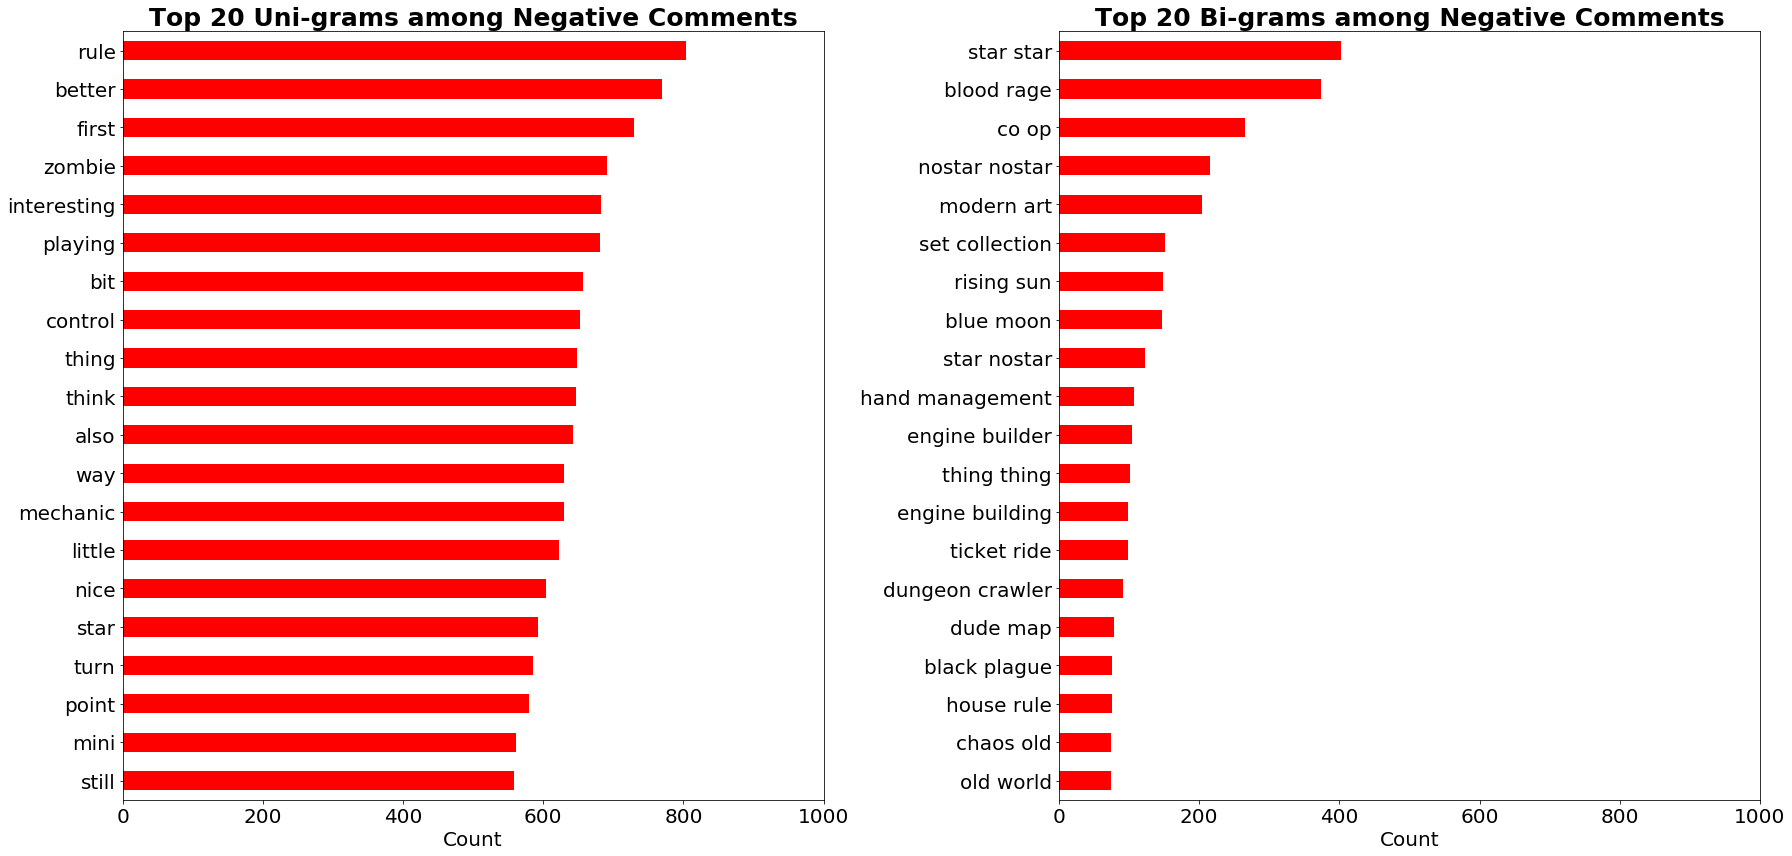

In [46]:
barplot_cvec(target=0,
             titles=['Top 20 Uni-grams among Negative Comments','Top 20 Bi-grams among Negative Comments'], 
             color='red',
             xlimit=(0,1000))

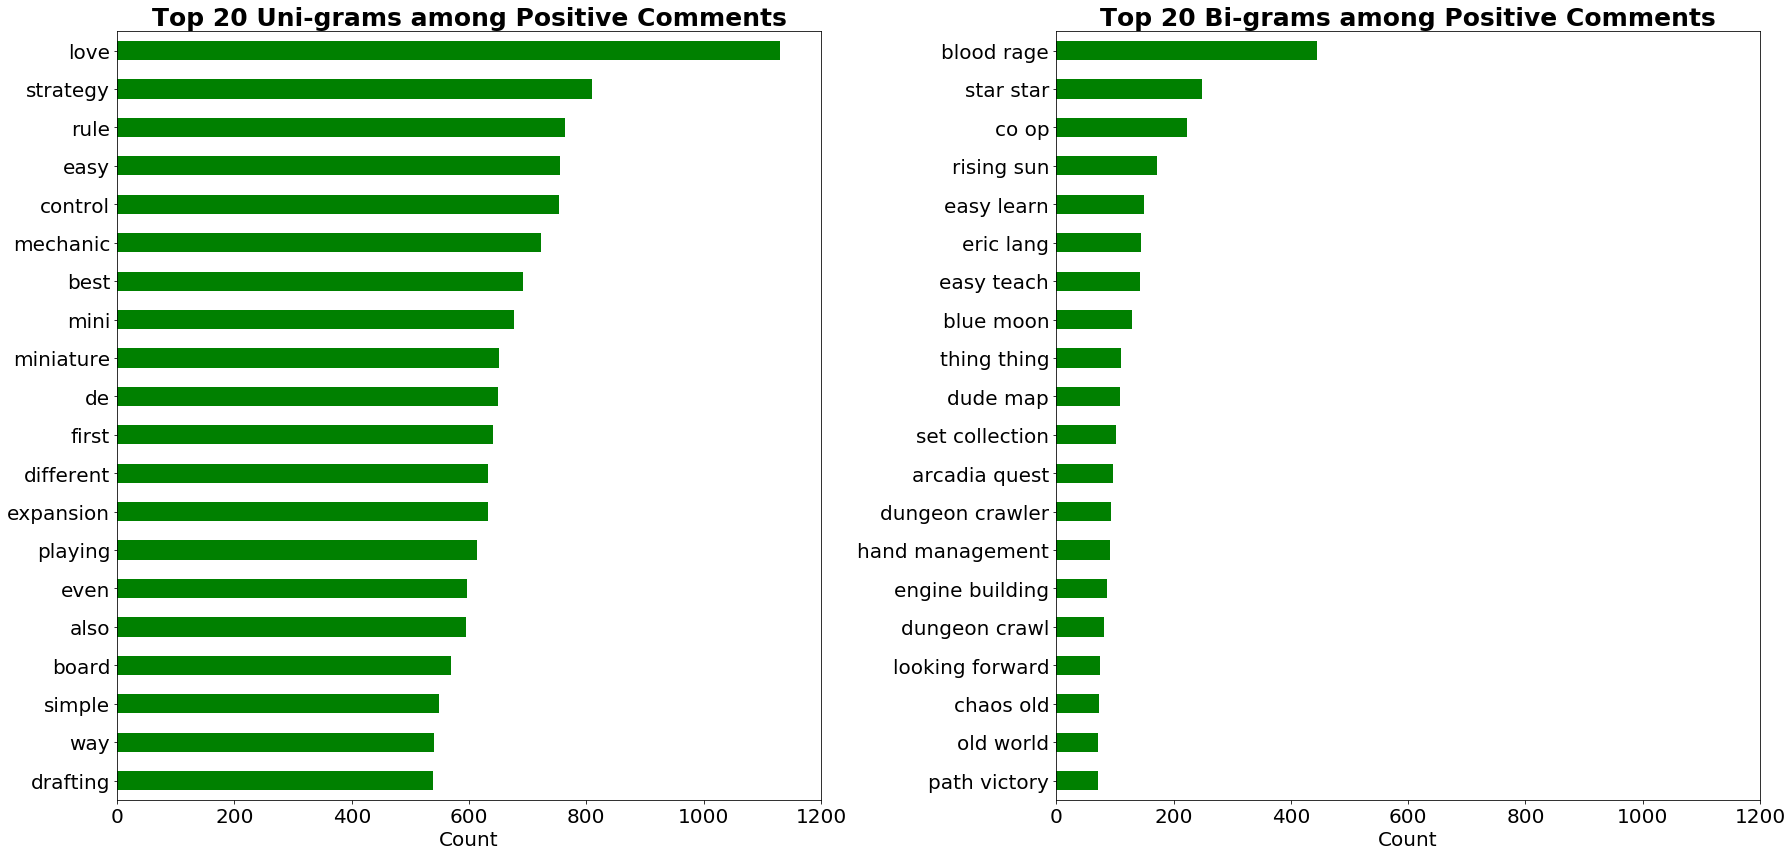

In [47]:
barplot_cvec(target=1,
             titles=['Top 20 Uni-grams among Positive Comments','Top 20 Bi-grams among Positive Comments'], 
             color='green',
             xlimit=(0,1200))

In [48]:
# Showing some of the negative reviews with the word 'rule'
df[(df['target']==0) & (df['comment_clean'].str.contains('rule'))][['comment','rating']].head()

,comment,rating
61,"third game in trilogy with ""Blood Rage"" and ""Rising Sun"" with Egyptian mythology theme\noddly restrictive\nretail version not recommendable\n\nCurrently it seems that ""Blood Rage"" remains by far the best of the series.\nBlood Rage >> Ankh > Rising Sun\n\n\nFrom what I've seen so far, I don't like a lot of the miniatures. Although they have elaborate details they look neither beautiful nor cool. Some don't look good at all (e.g. the Apep crocodile, Babi, Griffin, ...), some are very odd and disturbing (zombie cats, Pazuzu, Taweret, ...). \nThe best looking miniatures in the game are the normal warriors (and some of the priests). Best guardian miniature without real comeptition is Unut.\n\n+ Egyptian mythology theme, playing as gods and winning as mono deity\n+ deeper than it looks, shifting strategies: players have to adapt to what their opponents do, mind games ?\n- oddly restrictive\n-- balancing issues, runaway leader problem ?\n- unfortunate choices in the design of the miniatures*\n- Camels as border markers is just plain ridiculous.\n-- Kickstarter exclusive game content -> punishes retail buyers\n- only cardboard monuments in retail version\n- extremely expensive\n\n* There are some unfortunate choices in the design of the miniatures (camels as borders, Apep miniature, Thoth as ape, Bastet warriors wearing feline fleeces, exclusive monument miniatures not in sand color, pyramids too small?, Pazuzu, ...).\n\nThe merging of gods is basically a forced alliance. Not that innovative. But it's cool that it's tied in with the Egyptian theme.\nThe combinations of guardians to play with and of god powers to unlock are quite restricted. It seems there is a lot potential left out. But when you are lucky enough to have the KS exclusive guardians you can try to play with more diversity by house rule.\n\n\nissues I currently see in the game:\n- which players get to trigger the events seems more or less random\n- fixed number of conflicts and monument control events, not much opportunity to outdo opponents in specific fields\n- interlocked power unlocking and guardian recruitment\n- limited number of guardian figures per type, not every player can get one, and especially when behind on level 1 it's harder to catch up for the next levels\n- merging gods overpowered in case of close devotion state at time of merge (all players might need to work to avoid this game state, like with the Loki strategy in ""Blood Rage"")\n- only one type of guardian per level per game, the fact that they are divided in levels limits diversity severely, also more than one figure of same guardian is odd\n- every player has only 6 combat cards, all have the same, only two give power bonus, I wonder if a 7th card with +1 power and no ability would have been a good addition\n- hard to interact with a strong board position, most of the time it's hard to take away monuments from opponents\n- guardians not enough impact and come into play to late\n- ...",7.00
109,"Rules are not that well written, but it was understandable. Minis as you expect are really cool, flow is simple.",7.85
192,"Very poor balance, some heroes are basically broken. Runaway leader issues in campaign. Ridiculously tippy crit roll mechanic. Lots of little rules that are not well defined in the manual. Game takes too long for what it is. Would never play a campaign again, but as a standalone, simplistic, random-heavy arena battle game it might be fun.",3.00
208,"Awesome game! really fun, dice deppendant.\nBit long setup, bit long gameplay on late scenarios (4-6).\nA couple borken rules/items, had to house-rule some situations.\nGorgeous miniatures and general art (if you like chibbi of course).\nHighly recommended to get extra heroes",7.00
220,"2nd best of the mini-style games I've played so far. I like the simplicity of the rules, but the burst symbol makes it a bit too chatoic for my taste. \n\nI would certainly play it again, but not often.",6.00


In [49]:
# Showing some of the positive reviews with the word 'rule'
df[(df['target']==1) & (df['comment_clean'].str.contains('rule'))][['comment','rating']].head()

comment  \
4   [b]Ankh Micro Review:[/b]\nI have always had admiration for abstracts like Go that have a lot of depth with just a few, elegant rules. I have also always appreciated the mechanisms of euro games that create interesting decision making. I have always liked area control games. But abstracts and euros have always been dry, and thematic games have almost always been shallow. Could one game possibly integrate them all?\n\nLang has outdone himself and gives us Ankh: a hybrid, competitive multiplayer area control game for 2-5 players that has the best of all worlds: euro-quality mechanics, abstract area control (A mixture of Chess' piece movement and Go's multitasking), impressive miniatures and featuring high direct and indirect conflict.\n\n[b]Why I love it?[/b]\n-Design: It is very hard to make a competitive game that is excellent at 2 and 3 players. So, as much as I enjoy playing the game and being immersed in all that interesting decision making and strategy, I am also equally impressed by the depth and subtleties that the design allows.\n-Excellent hybrid: While it retains the important qualities of ameri/war area control games (miniatures and high territorial conflict), it also integrates seamlessly both euro and abstract qualities in an elegant manner. You get the joy of high conflict area control, juicy euro mechanisms and abstract depth all in one regular length session.\n-Depth: It has as much high quality indirect conflict as direct, with tactical and strategic importance. The way everything integrates adds an unprecedented amount of depth and subtlety.\n-Skill matters: This game rewards a lot of skill and removes a lot of things that usually get in the way of that. Every decision matters and every move makes sense. It is clear that winners outplayed the losers and, in retrospect, which moves were game-winning and which were mistakes.\n-More than replayability: This game offers a novel experience every game. Replayability and asymmetry are not just throwing together a mindless salad, but they are features of mixing a few high impact elements that affect short and long term strategy as well as dynamically evolving during the game due to player's decisions.\n\n[b]Why it may not be for you?[/b]\n-More brain burn than theme: Yes, there are many powerful thematic mechanisms and splendid miniatures, but it is closer to Spirit Island, where the game is best enjoyed at its crunchy and deep gameplay rather than for theme.\n-There are 2 potential group dependent factors may get in the way:\n*Doesn't hold your hand: The first game will be cognitively overwhelming, and experience may be an advantage for the first few games. Then, skill dominates. Let me tell you that people are not used to games where the best player wins, plain and simple. Many games allow all players a fair chance, this one will punish you for mistakes.\n*Balance is in the eye of the beholder: Perception of how strong one isolated element is may also be an issue with newbies. Low skill players may not be able to figure out a way to outplay a seemingly strong element. Examples: Denying someone of event triggering (it 'feels' bad, but 2 actions are sometimes better), the monster Satet (it can move even gods to other regions but only if the player allows it by placing their god in a frontier hex) and the god Set (takes control of adjacent units, so you cluster and corner your units).\n\n[b]Player Scaling:[/b]\nThe fact that the number of players will scale down means it plays well at the lower player counts, 2 and 3 players, where it feels extremely strategic. At 4 and 5 players, the game feels more chaotic, but you also get areas chock full of units and combat so it is more ameritrash/thematic. Game length with 4-5 new players can be long. The higher complexity of the game state can induce AP. Maybe scale at 3/4/5 spaces away for short/medium/long as another option for a 'blitz' scenario.\n\n***[i]No design or major balance flaws detected in one day. W

In [50]:
train.head(5)

,Unnamed: 0,username,rating,comment,comment_clean,number_of_words,target
0,997,johncraven,8.0,"Surprisingly good game, did not expect it to play this well.",surprisingly good game expect play well,6,1
1,391,Benjamin Bretey,7.0,Throne of Odin (I think?) that doubles quests points seems monstrously game-breaking. Really fun game otherwise.,throne odin think double quest point seems monstrously game breaking really fun game otherwise,14,0
2,1018,narcisolema,8.0,"Arcadia es uno de mis dungeon crawlers favoritos, y lo es por lo simple que es. Muchas veces es muy dificil conseguir que todos en la mesa quieran jugar un Descent o un Temple of Elemental Evil, pero Arcadia, no terminas de decir su nombre y ya todos aceptaron! :D \nEl tema aquí es que las reglas son simples, la forma como los jugadores van haciendo crecer a sus personas lo es igual, y sientes como tu personaje se va volviendo más poderoso a punta de ítems. La temática es de las más lindas que hay, ese diseño chibi japonés, hace que todo se sienta tan ligero, pero al momento de jugar! a ver si te escapas de que los demás jugadores no te quieran cortar en pedacitos! \nUn excelente juego! Porque no un 9 o un 10, porque finalmente es muy simple y eso hace que los personajes no se sientan tan personalizables, sientes que tienes los mejores items, pero todos los podrían tener, así que ese detalle es el que me lleva al 8.",arcadia e uno de mi dungeon crawler favoritos lo e por lo simple que e muchas veces e muy dificil conseguir que todos en la mesa quieran jugar un descent un temple elemental evil pero arcadia terminas de decir su nombre ya todos aceptaron el tema aqu e que la reglas son simple la forma como los jugadores van haciendo crecer sus persona lo e igual sientes como tu personaje se va volviendo poderoso punta de tems la tem tica e de la lindas que hay ese dise chibi japon hace que todo se sienta tan ligero pero al momento de jugar ver si te escapas de que los dem jugadores te quieran cortar en pedacitos un excelente juego porque un un porque finalmente e muy simple eso hace que los personajes se sientan tan personalizables sientes que tienes los mejores item pero todos los podr tener que ese detalle e el que lleva al,155,1
3,173,Eldrassil,9.0,Great Game! Easy Rules and a lot of fun!,great game easy rule lot fun,6,1
4,603,burnstar,10.0,"10x10 2016 Fantastic area control game. Great art and minis. Plays relatively quick and keeps everyone engaged with fast turns. The drafting is fun. Lots of variety. Battles are fast but tense. Can be a little unforgiving but it's rare that a mistake is completely unrecoverable. Overall, a very special game that does everything just about perfectly.",x fantastic area control game great art mini play relatively quick keep everyone engaged fast turn drafting fun lot variety battle fast tense little unforgiving rare mistake completely unrecoverable overall special game everything perfectly,34,1


In [51]:
train.to_csv('./datasets/clean_train.csv', index=False)

In [52]:
test.to_csv('./datasets/clean_test.csv', index=False)

## Topic Modelling for Positive Comments

In [53]:
# Create a list of all the textual data from positive reviews
data = train[train['target']==1]['comment'].values.tolist()

In [54]:
# Assign NLTK's stopwords to stop_words
stop_words = stopwords.words('english')

# Include frequently occuring words
stop_words.extend(['game','play','player','really','one','card',
              'played','lot','fun','good','get','great','get','theme','well',
              'well','like','make','time','area','much','would','feel'])

In [55]:
# Remove stopwords, lemmatize and only keep tokens that fall into these part of speech tags
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm')
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        # Lemmatize and only keep tokens that have certain part of speech tags
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags]) 
    # Remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

# Pre-processing text
data_ready = process_words(data)

In [56]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready) 

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, # Number of topics
                                           random_state=42,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.013*"way" + 0.012*"go" + 0.011*"also" + 0.011*"even" + 0.011*"expansion" '
  '+ 0.011*"think" + 0.011*"give" + 0.010*"many" + 0.010*"look" + '
  '0.009*"blood"'),
 (1,
  '0.030*"rule" + 0.026*"easy" + 0.017*"nice" + 0.016*"always" + '
  '0.013*"campaign" + 0.012*"hero" + 0.012*"long" + 0.012*"teach" + '
  '0.011*"scenario" + 0.011*"light"'),
 (2,
  '0.027*"love" + 0.021*"thing" + 0.021*"strategy" + 0.017*"miniature" + '
  '0.014*"control" + 0.014*"simple" + 0.012*"point" + 0.012*"mechanic" + '
  '0.011*"different" + 0.011*"draft"')]


In [57]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Formatting the table
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.7777,"way, go, also, even, expansion, think, give, many, look, blood","[surprisingly, expect]"
1,1,2.0,0.9324,"love, thing, strategy, miniature, control, simple, point, mechanic, different, draft","[simple, vece, jugadore, igual, escapa, jugadore, simple, personalizable, siente, mejore, pero]"
2,2,1.0,0.7778,"rule, easy, nice, always, campaign, hero, long, teach, scenario, light","[easy, rule]"
3,3,2.0,0.8092,"love, thing, strategy, miniature, control, simple, point, mechanic, different, draft","[fantastic, relatively, quick, keep, engage, fast, turn, draft, variety, battle, fast, tense, little, unforgive, rare, mistake, completely, unrecoverable, overall, special, perfectly]"
4,4,0.0,0.3333,"way, go, also, even, expansion, think, give, many, look, blood",[]


In [58]:
# Keywords of each dominant topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic') 

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show the 3 topics
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9742,"way, go, also, even, expansion, think, give, many, look, blood","[mark, exclusive, content, unethical, unethical, push, away, take, advantage, fear, pay, behaviour, lose, interest, people, dislike, rate, explain, reason, comment, happen, rate, include, paste, comment]"
1,1.0,0.9693,"rule, easy, nice, always, campaign, hero, long, teach, scenario, light","[témájával, story, és, többiek, össze, hogy, kártya, közül, csak, küldetés, kapunk, kezünkbe, minimum, hármat, amint, kis, amelyek, csapást, részére, dobni, első, küldetés, lelkesítő, valakinek]"
2,2.0,0.9738,"love, thing, strategy, miniature, control, simple, point, mechanic, different, draft","[board, strategy, thematic, fantasy, fight, mythology, miniature, control, influence, movement, drafting, action, point, allowance, system, variable, power, complexity, splendid, control, influence, interaction, stunning, artwork, miniature]"


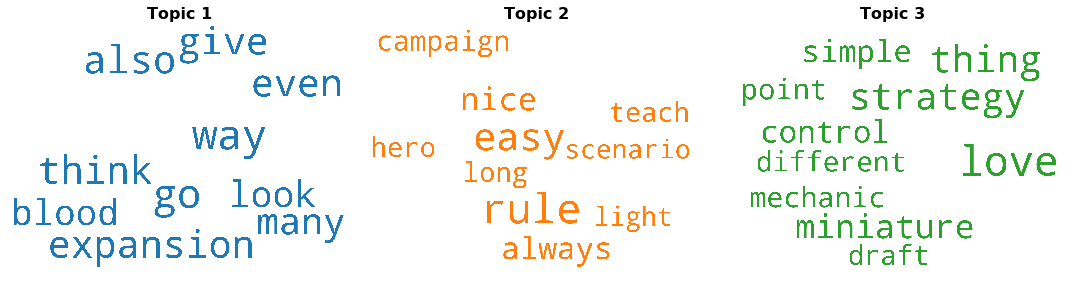

In [60]:
# Wordcloud of Top 15 words in each topic

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,10), sharex=True, sharey=True)

topic_names = ['Topic 1', 'Topic 2', 'Topic 3']

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], weight='bold', fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Findings: Key topics from comments

### Expansion Set matters

Gameplayers likes boardgames with expansion possibilities, for example, those with possibilities of adding additional characters. CMON can consider holding back some game characters or items in the basic set and then launch the expansion sets at a later date at a better price to churn out more revenue.

### Campaign and Easy Rules matters

Having a good campaign to launch the game is important to attract  consumers. Currently, campaigns are launched with videos made for the new launch and published on youtube. Another way could be getting social media influencers to play the games and launch the videos on youtube. It also appears that games with easy rules matter to players. 

### Strategy and Miniature Matters

Players likes games that allows them to strategize and execute different controls/ mechanics and gameplay, but it has to be simple at the same time. Some players are also draw to the miniatures and buys the gamesets as a collectors item rather than using it as a boardgame.

